# Setup

In [2]:
# 라이브러리 임포트

import pandas as pd # pandas: DataFrame, Series 등을 다루는 라이브러리
import numpy as np # numpy: python으로 행렬 처리 등을 도와주는 라이브러리
import tensorflow as tf # tensorflow: 인공지능 관련 라이브러리
import autokeras as ak # autokeras: 오토케라스

In [ ]:
from sklearn.datasets import fetch_california_housing # 캘리포니아 주택 정보 데이터셋 임포트

In [ ]:
house_dataset = fetch_california_housing() # 캘리포니아 주택 정보 데이터셋 로드
df = pd.DataFrame(
    np.concatenate(
        (house_dataset.data, house_dataset.target.reshape(-1, 1)), axis=1
    ),
    columns=house_dataset.feature_names + ["Price"],
) # 데이터셋을 DataFrame(엑셀과 비슷한 자료 정리 형식)으로 만듬

In [ ]:
train_size = int(df.shape[0]*0.9)
train_file_path = "data\\train.csv"
test_file_path = "data\\test.csv"
df[:train_size].to_csv(train_file_path, index=False)
df[train_size:].to_csv(test_file_path, index=False)
# 데이터셋을 파일로 저장, 0.9 만큼은 train data로, 0.1만큼은 test data로 저장

In [ ]:
from tensorflow.keras.datasets import mnist # mnist 데이터 임포트

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist 데이터셋 로드
print(x_train.shape)  # 데이터셋 (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

In [14]:
dataset = "data\\AirQualityUCI.csv" # 공기 품질 데이터셋 경로

In [15]:
dataset = pd.read_csv(dataset, sep=";") # 공기 품질 데이터셋 로드
dataset = dataset[dataset.columns[:-2]]
dataset = dataset.dropna() 
dataset = dataset.replace(",", ".", regex=True)
# 데이터셋 처리

In [ ]:
val_split = int(len(dataset) * 0.7)
data_train = dataset[:val_split]
validation_data = dataset[val_split:]

data_x = data_train[
    [
        "CO(GT)",
        "PT08.S1(CO)",
        "NMHC(GT)",
        "C6H6(GT)",
        "PT08.S2(NMHC)",
        "NOx(GT)",
        "PT08.S3(NOx)",
        "NO2(GT)",
        "PT08.S4(NO2)",
        "PT08.S5(O3)",
        "T",
        "RH",
    ]
].astype("float64")

data_x_val = validation_data[
    [
        "CO(GT)",
        "PT08.S1(CO)",
        "NMHC(GT)",
        "C6H6(GT)",
        "PT08.S2(NMHC)",
        "NOx(GT)",
        "PT08.S3(NOx)",
        "NO2(GT)",
        "PT08.S4(NO2)",
        "PT08.S5(O3)",
        "T",
        "RH",
    ]
].astype("float64")

# Data with train data and the unseen data from subsequent time steps.
data_x_test = dataset[
    [
        "CO(GT)",
        "PT08.S1(CO)",
        "NMHC(GT)",
        "C6H6(GT)",
        "PT08.S2(NMHC)",
        "NOx(GT)",
        "PT08.S3(NOx)",
        "NO2(GT)",
        "PT08.S4(NO2)",
        "PT08.S5(O3)",
        "T",
        "RH",
    ]
].astype("float64")

data_y = data_train["AH"].astype("float64")

data_y_val = validation_data["AH"].astype("float64")

print(data_x.shape)  # (6549, 12)
print(data_y.shape)  # (6549,)

# 입력값과 출력값 추출

# AutoKeras Structured Regression

by 문승현

In [ ]:
reg = """AutoKeras 모델 생성"""(
    overwrite=True, max_trials=5
)

reg."모델 학습"(
    """학습 데이터 경로""",
    "Price",
    epochs=20,
    validation_split=0.15
)

predicted_y = """모델로부터 예측값 획득"""
"""예측값 평가"""

In [ ]:
model = reg.export_model() # 모델 저장
model.summary()

# AutoKeras Image Classification

by 문승현

In [ ]:
clf = """AutoKeras Image 모델 생성"""(
    overwrite=True, max_trials=3
)

clf."""모델 학습"""(
    """입력값""",
    """출력값""",
    epochs=1,
    validation_split=0.15
)

predicted_y = """모델로부터 예측값 획득"""
print(predicted_y)
"""예측값 평가"""

In [ ]:
model = clf.export_model() # 모델 저장
model.summary()

# AutoKeras TimeSeriesForecaster

by 문승현

In [ ]:
predict_from = 1
predict_until = 10
lookback = 3

clf = """AutoKeras TimeseriesForeCaster 모델 생성""" (
    lookback=lookback,
    predict_from=predict_from,
    predict_until=predict_until,
    max_trials=1,
    objective="val_loss",
)

clf."""모델 학습"""(
    x="""입력값""",
    y="""출력값""",
    validation_data="""확인 데이터""",
    batch_size=32,
    epochs=10,
)

predictions = """모델로부터 예측값 획득"""
print(predictions.shape)
"""예측값 평가"""

In [ ]:
model = clf.export_model() # 모델 저장
model.summary()

# Learning Basic Pandas

이 섹션에서는 pandas 라는 라이브러리의 사용법을 알아봅시다


### 1.Pandas 라이브러리 import하기

In [ ]:
import pandas as pd # pandas 임포트

### 2.파일에서 데이터 로드하기

- 확장자가 CSV가 아닌 파일 즉, 데이터를 구분하는 구분자(separator)가 쉼표(comma)가 아니면 sep 인수를 써서 구분자를 사용자가 지정해준다. 
- 만약 구분자가 길이가 정해지지 않은 공백인 경우에는 \s+라는 정규식(regular expression) 문자열을 사용한다.

In [ ]:
# csv타입 데이터 파일, sep:구분자로 여러 공백 지정, 피처이름 없음.
data = """csv 파일 읽어오기"""

파일로부터 데이터를 가져와서 DataFrame 생성하여 반환한다.

In [ ]:
data."""처음 5행 출력"""

In [ ]:
data."""설명"""

# How to Show Data

by 최민준

In [24]:
import matplotlib.pyplot as plt # matplotlib.pyplot 임포트
import seaborn as sns # seaborn 임포트
plt.rc('font', family='NanumBarunGothic')

In [25]:
data = pd.read_csv("data\\train.csv") # 데이터 로드

In [26]:
data.head() # 데이터 처음 5줄 출력

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<AxesSubplot:>

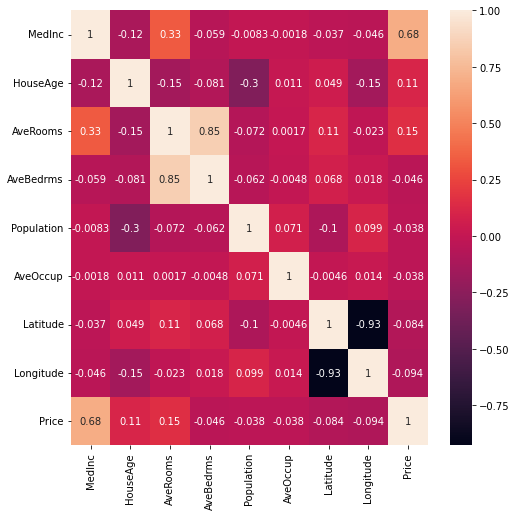

In [27]:
plt.figure(figsize=(8,8))
sns."""히트맵"""("""상관계수""", annot = True)

In [34]:
data = pd.read_csv("data\\AirQualityUCI.csv", sep=';') # 공기 품질 데이터 로드

In [35]:
data.head() # 데이터 처음 5줄

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


[]

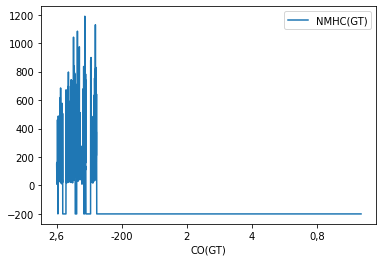

In [51]:
hourly = data."""그래프 그리기"""('CO(GT)', 'NMHC(GT)')
hourly.plot()

# How to make a simple AI Model

by 고도영